# Eigenvalue Analysis

## Run Eigenvalue Analysis

In [1]:
import numpy as np

import andes
from andes.utils.paths import list_cases, get_case

In [2]:
case_path = get_case('kundur/kundur_full.xlsx')

Pass the routine name `EIG` or `eig` to `andes.run`.

In [3]:
ss = andes.run(case_path, routine='eig')

Working directory: "/home/hacui/repos/andes/examples"
> Loaded config from file "/home/hacui/.andes/andes.rc"
> Loaded generated Python code in "/home/hacui/.andes/pycode".
Parsing input file "/home/hacui/repos/andes/andes/cases/kundur/kundur_full.xlsx"...
Input file parsed in 0.1985 seconds.
System internal structure set up in 0.0309 seconds.
-> System connectivity check results:
  No islanded bus detected.
  System is interconnected.
  Each island has a slack bus correctly defined and enabled.

-> Power flow calculation
           Numba: Off
   Sparse solver: KLU
 Solution method: NR method
Power flow initialized in 0.0042 seconds.
0: |F(x)| = 14.9282832
1: |F(x)| = 3.608627841
2: |F(x)| = 0.1701107882
3: |F(x)| = 0.002038626956
4: |F(x)| = 3.745104027e-07
Converged in 5 iterations in 0.0070 seconds.
Report saved to "kundur_full_out.txt" in 0.0010 seconds.
Initialization for dynamics completed in 0.0301 seconds.
Initialization was successful.

-> Eigenvalue Analysis:
  Positive      

-> Single process finished in 0.5363 seconds.


## Plotting in S-Domain

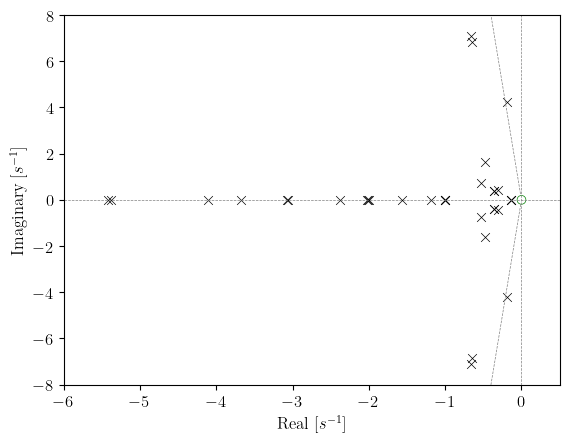

(<Figure size 640x480 with 1 Axes>,
 <AxesSubplot:xlabel='Real [$s^{-1}$]', ylabel='Imaginary [$s^{-1}$]'>)

In [4]:
ss.EIG.plot()

## Report

Report is saved to the file and can be loaded into the notebook.

In [5]:
with open('kundur_full_eig.txt', 'r') as f:
    print(f.read())

ANDES 1.7.5.post2.dev0+ga53a31fa
Copyright (C) 2015-2022 Hantao Cui

ANDES comes with ABSOLUTELY NO WARRANTY
Case file: /home/hacui/repos/andes/andes/cases/kundur/kundur_full.xlsx
Report time: 07/05/2022 08:57:50 PM

Power flow converged in 5 iterations.
Flat-start: No


EIGENVALUE ANALYSIS REPORT                                    

Positives                          0
Zeros                              1
Negatives                         52

STATISTICS
                     Most Associated              Real             Imag.      Damped Freq.         Frequency       Damping [%]

#1                      LL_x EXDC2 1                -1                 0                 0                 0                 0
#2                      LL_x EXDC2 2                -1                 0                 0                 0                 0
#3                      LL_x EXDC2 3                -1                 0                 0                 0                 0
#4                      LL_x EXD

## Parameter Sweep and Root Loci Plot

Parameter sweep allows automatically applying a set of parameters to compute the
eigenvalues. It is useful to plot the root loci of the system.

In this example, we will study the impact of ``EXDC2.KA`` of the device
`1` on the system stability. Let its `KA` vary evenly between 20 to 200 in 10
steps.


In [6]:
ret = ss.EIG.sweep(ss.EXDC2.KA, 1, np.linspace(20, 200, 10))

Plot the 30th to the 50-th eigenvalues (0-based index) on the s-plane:

(<Figure size 640x480 with 1 Axes>,
 <AxesSubplot:xlabel='Real [$s^{-1}$]', ylabel='Imaginary [$s^{-1}$]'>)

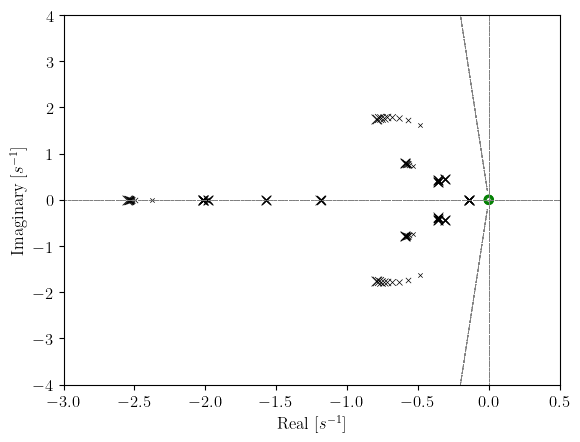

In [7]:

ss.EIG.plot_root_loci(ret, range(30, 51), left=-3, ymax=4, ymin=-4)

Note that the marker size increases linearly as the parameters sweep from the
first to the last. We recommend sweeping the parameter in an ascending order so
that the larger marker size correspond to a larger parameter.

## Cleanup

In [8]:
!andes misc -C

"/home/hacui/repos/andes/examples/kundur_full_out.txt" removed.
"/home/hacui/repos/andes/examples/kundur_full_eig.txt" removed.
